In [70]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from operator import itemgetter

In [71]:
with open('./data/autori_cleaned', 'rb') as file:
    autori = pd.read_pickle(file)
with open('./data/data_cleaned', 'rb') as file:
    data = pd.read_pickle(file)

In [72]:
print(autori.head())
print(data.head())

          Ime            Prezime                    Katedra  H indeks  \
0       tanja          jovanovic  katedra za mikrobiologiju        11   
1  branislava              savic  katedra za mikrobiologiju        10   
2       sanja           mitrovic  katedra za mikrobiologiju         4   
3       lazar              ranin  katedra za mikrobiologiju         7   
4   valentina  arsic-arsenijevic  katedra za mikrobiologiju        17   

   Broj radova  id                     Puno ime              Skraceno  
0           45   0              tanja jovanovic          jovanovic t.  
1           30   1             branislava savic              savic b.  
2           20   2               sanja mitrovic           mitrovic s.  
3           40   3                  lazar ranin              ranin l.  
4           52   4  valentina arsic-arsenijevic  arsic-arsenijevic v.  
                    Author                                            Authors  \
0  jasmina simonovic-babic  chkhartishvili n., h

In [73]:
G = nx.Graph()
for _,row in autori.iterrows():
    G.add_node(row['Puno ime'], katedra=row['Katedra'])

In [74]:
from itertools import combinations

title_grouped = data.groupby('Title')['Author']
for _,authors in title_grouped:
    author_list = authors.tolist()
    author_pairs = combinations(author_list,2)
    for autor1,autor2 in author_pairs:
        if (autor1, autor2) in G.edges:
            G.edges[autor1,autor2]['weight'] += 1
        else:
            G.add_edge(autor1, autor2, weight=1)

In [75]:
output_path="models/undirected_papper_colaboration.gml"
nx.write_gml(G, output_path)

In [76]:
# Calculate density
density = nx.density(G)
print(f'Network Density: {density}')

Network Density: 0.1748911465892598


In [77]:
avg_distance = nx.average_shortest_path_length(G)
print(f'Average Distance: {avg_distance}')

Average Distance: 2.3570391872278664


In [78]:
diameter = nx.diameter(G)
print(f'Diameter: {diameter}')

Diameter: 5


In [79]:
if nx.is_connected(G):
    num_components = 1
    component_sizes = [len(G.nodes)]
else:
    components = list(nx.connected_components(G))
    num_components = len(components)
    component_sizes = [len(component) for component in components]

print(f'Number of Connected Components: {num_components}')
print(f'Size of Each Component: {component_sizes}')

Number of Connected Components: 1
Size of Each Component: [53]


Imam jednu dzinovsku komponentu?

In [80]:
def calculate_centralities(G):

    DC_dict = nx.degree_centrality(G)
    CC_dict = nx.closeness_centrality(G)
    BC_dict = nx.betweenness_centrality(G)
    EVC_dict = nx.eigenvector_centrality(G)

    df1 = pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df = pd.concat([df1, df2, df3, df4], axis=1)
    return df

In [81]:
df = calculate_centralities(G)
print(df)

                                      DC        CC        BC       EVC
tanja jovanovic                 0.192308  0.504854  0.028419  0.141412
branislava savic                0.134615  0.400000  0.007689  0.053655
sanja mitrovic                  0.153846  0.452174  0.057838  0.044523
lazar ranin                     0.230769  0.440678  0.058853  0.100766
valentina arsic-arsenijevic     0.134615  0.444444  0.032813  0.044053
slobodanka djukic               0.173077  0.485981  0.025996  0.102227
maja cupic                      0.288462  0.514851  0.065122  0.184637
natasa vuckovic-opavski         0.019231  0.307692  0.000000  0.009229
aleksandar dzamic               0.173077  0.477064  0.057653  0.071758
dragana vukovic                 0.230769  0.456140  0.049766  0.090203
ivana dakic                     0.134615  0.385185  0.004168  0.051220
aleksandra knezevic             0.192308  0.514851  0.030857  0.137538
ivana lazarevic                 0.365385  0.553191  0.171774  0.303525
maja s

In [82]:
# Calculate centralization
def centralization(G):
    centralities = nx.degree_centrality(G)
    max_centrality = max(centralities.values())
    centralization = sum(max_centrality - c for c in centralities.values()) / ((len(G) - 1) * (len(G) - 2))
    return centralization

centralization_value = centralization(G)
print(f'Centralization: {centralization_value:.4f}')

Centralization: 0.0038


In [83]:
global_clustering_coefficient = nx.transitivity(G)
print(f'Global Clustering Coefficient (Transitivity): {global_clustering_coefficient}')

average_clustering_coefficient = nx.average_clustering(G)
print(f'Average Clustering Coefficient: {average_clustering_coefficient}')

local_clustering_coefficients = nx.clustering(G).values()


Global Clustering Coefficient (Transitivity): 0.5450928381962865
Average Clustering Coefficient: 0.6005288212835383


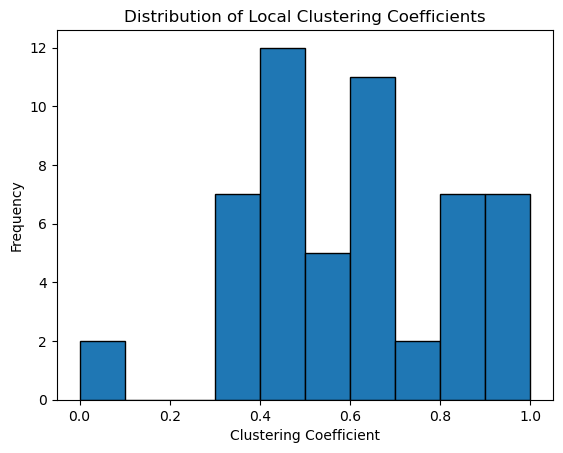

In [84]:
# 2. Plot the distribution of local clustering coefficients
plt.hist(local_clustering_coefficients, bins=10, edgecolor='black')
plt.title('Distribution of Local Clustering Coefficients')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

In [85]:
# Erdos-Renyi Random Graph
n = G.number_of_nodes()
p = nx.density(G)  
G_erdos = nx.erdos_renyi_graph(n, p)

In [86]:
# Scale-Free Network
G_scale_free_multi = nx.scale_free_graph(n)
G_scale_free = nx.Graph(G_scale_free_multi)

In [87]:
# Calculate clustering coefficients for comparison
average_clustering_erdos = nx.average_clustering(G_erdos)
average_clustering_scale_free = nx.average_clustering(G_scale_free)
transitivity_erdos = nx.transitivity(G_erdos)
transitivity_scale_free = nx.transitivity(G_scale_free)

print(f'Erdos-Renyi Average Clustering Coefficient: {average_clustering_erdos}')
print(f'Erdos-Renyi Global Clustering Coefficient: {transitivity_erdos}')
print(f'Scale-Free Average Clustering Coefficient: {average_clustering_scale_free}')
print(f'Scale-Free Global Clustering Coefficient: {transitivity_scale_free}')

Erdos-Renyi Average Clustering Coefficient: 0.15864031147050023
Erdos-Renyi Global Clustering Coefficient: 0.1518987341772152
Scale-Free Average Clustering Coefficient: 0.1269693939657421
Scale-Free Global Clustering Coefficient: 0.0712166172106825


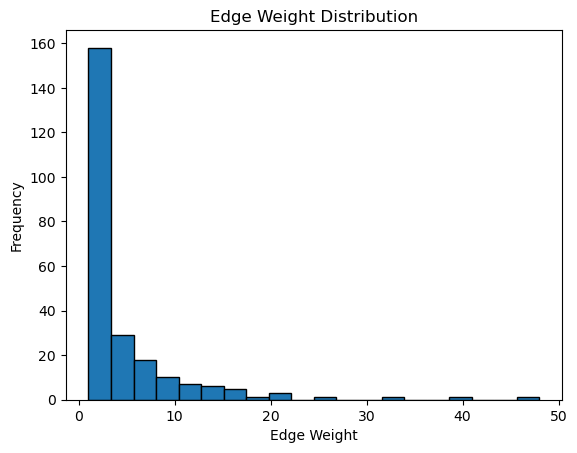

In [88]:
# 1. Edge Weight Distribution
weights = [data['weight'] for u, v, data in G.edges(data=True)]
plt.hist(weights, bins=20, edgecolor='black')
plt.title('Edge Weight Distribution')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.show()


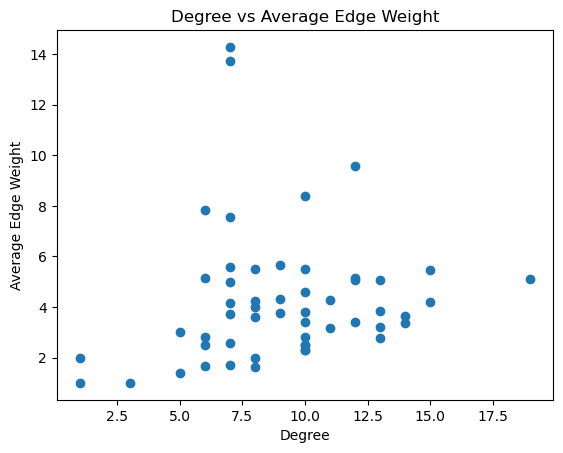

In [89]:
# 2. Degree vs. Average Edge Weight  vidi sto ti ovo po stepenu???
degrees = dict(G.degree())
strengths = dict(G.degree(weight='weight'))
avg_edge_weights = {node: strengths[node] / degrees[node] for node in G.nodes()}
plt.scatter(degrees.values(), avg_edge_weights.values())
plt.title('Degree vs Average Edge Weight')
plt.xlabel('Degree')
plt.ylabel('Average Edge Weight')
plt.show()


In [90]:
assortativity_coefficient = nx.degree_assortativity_coefficient(G)
print(f'Degree Assortativity Coefficient: {assortativity_coefficient}')

Degree Assortativity Coefficient: 0.04567166142802434


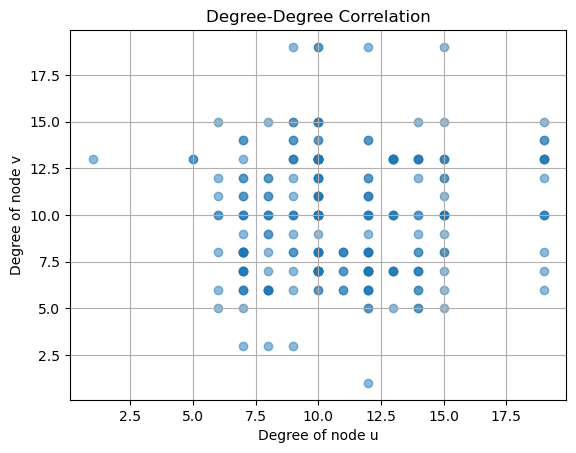

In [91]:
degrees = dict(G.degree())
x, y = zip(*[(degrees[u], degrees[v]) for u, v in G.edges()])

plt.scatter(x, y, alpha=0.5)
plt.title('Degree-Degree Correlation')
plt.xlabel('Degree of node u')
plt.ylabel('Degree of node v')
plt.grid(True)
plt.show()

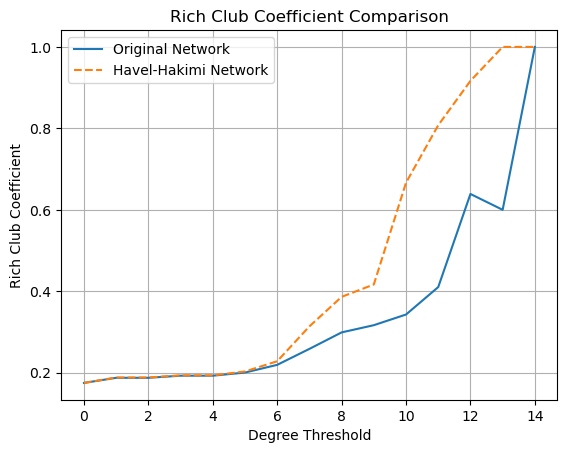

In [99]:
rich_club_coefficient_original = nx.rich_club_coefficient(G, normalized=False)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
G_havel_hakimi = nx.havel_hakimi_graph(degree_sequence)
rich_club_coefficient_havel_hakimi = nx.rich_club_coefficient(G_havel_hakimi, normalized=False)


degrees = sorted(set(rich_club_coefficient_original.keys()) & set(rich_club_coefficient_havel_hakimi.keys()))

original_values = [rich_club_coefficient_original[d] for d in degrees]
havel_hakimi_values = [rich_club_coefficient_havel_hakimi[d] for d in degrees]

plt.plot(degrees, original_values, label='Original Network')
plt.plot(degrees, havel_hakimi_values, label='Havel-Hakimi Network', linestyle='--')
plt.xlabel('Degree Threshold')
plt.ylabel('Rich Club Coefficient')
plt.title('Rich Club Coefficient Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
# 1. Calculate degree sequence
degree_sequence = [d for n, d in G.degree()]
degree_count = np.bincount(degree_sequence)
degrees = np.arange(len(degree_count))
print('degrees: ', degrees)
print('degree_count: ', degree_count)


degrees:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
degree_count:  [ 0  2  0  1  0  2  5  9  6  3 10  2  4  4  2  2  0  0  0  1]


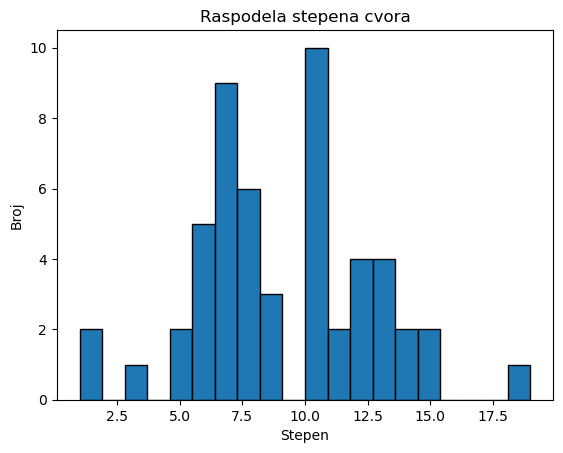

In [61]:
plt.hist(degree_sequence, bins=20, edgecolor='black')
plt.title('Raspodela stepena cvora')
plt.xlabel('Stepen')
plt.ylabel('Broj')
plt.show()


ModuleNotFoundError: No module named 'powerlaw'

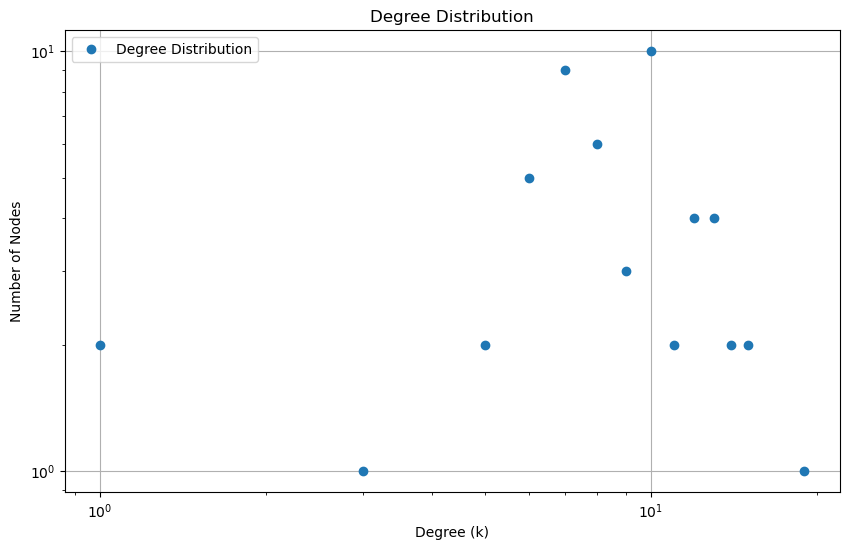

In [58]:
plt.figure(figsize=(10, 6))
plt.loglog(degrees, degree_count, marker='o', linestyle='None', label='Degree Distribution')
plt.title("Degree Distribution")
plt.xlabel("Degree (k)")
plt.ylabel("Number of Nodes")
plt.legend()
plt.grid(True)
plt.show()